1. Importing packages and dataset

In [1]:

import datetime
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
from numpy import vectorize
from src.source_codes import *
#from scipy.optimize import curve_fit
from datetime import timedelta
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.patches import FancyArrowPatch
from matplotlib.dates import date2num
%matplotlib inline
#!pip install numpy
#!pip install jupyter_contrib_nbextensions
#!pip install scipy

In [2]:
with open("data/Set-2/Hive_E_summary_2020.pickle", "rb") as f:
#with open("../Data_Final/Hive_D_summary_2020.pickle", "rb") as f:
#with open("CriticalH.pickle", "rb") as f:
    A = pickle.load(f)

2. Removing cells with empty records or zeros

In [3]:
Dates=A['Date']
E_T = A['E.T']
H_T = A['H.T']

Indexes=np.where(np.array(H_T)==0) 

Dates=np.delete(Dates,Indexes)
E_T=np.delete(E_T,Indexes)
H_T=np.delete(H_T,Indexes)


Dates_daylight=[]
E_T_daylight=[]
H_T_daylight=[]


gap=8 # Looking for approximately two hours since the maximun/minimun temperature was recorded

3. Looking for indexes for the maximun Environmental temperature and their corresponding index in the Hive Temperature

In [4]:
for i in range(len(Dates)):
    H=Dates[i].hour
    if 6 <= H < 18:
      Dates_daylight.append(Dates[i])
      E_T_daylight.append(E_T[i])
      H_T_daylight.append(H_T[i])

t=-1 #starting condition
j=0
Index_max=[]
Index_max_hive=[ ]
Delta_day=[-1]
for i in range(len(Dates_daylight)):
    delta_time = Dates_daylight[i]- Dates_daylight[28] ####!!!! The index [28] represents 6:00 am of the first recorded day [Set 2]
    if delta_time.days > t:
        if i-1 > j:
            index=np.where(E_T_daylight[j:i]==np.max(E_T_daylight[j:i]))[0]# It will calculate the maximun value ET from [j to i-1] reason [i-1]>j
            index_aux=np.where(H_T_daylight[int(index[0]+ j):int(index[0]+ j + gap)] == np.max(H_T_daylight[int(index[0]+ j):int(index[0]+ j + gap)]))[0]
            
        else:
            index=[0]
            index_aux=[0]
            
        Index_max.append(int(index[0] +j))
        Index_max_hive.append(int(index[0] +j+ index_aux[0]))
        
        Delta_day.append(delta_time.days)
        t += Delta_day[-1]-Delta_day[-2] #1
        j=i                               

4. Looking for indexes for the minimun Environmental temperature and their corresponding index in the Hive Temperature

In [5]:
t=-1 #starting condition
j=0
Index_min=[ ]
Index_min_hive=[ ]
Delta_day=[-1]
for i in range(len(Dates)):
    delta_time = Dates[i]- Dates[24]# Considering sunset from sunset 5:00 p.m to 5:00 p.m  [24] for this data set 2[24]
    if delta_time.days > t:
        if i-1 > j:
            index=np.where(E_T[j:i]==np.min(E_T[j:i]))[0]# It will calculate the minimun value ET from [j to i-1] reason [i-1]>j
            index_aux=np.where(H_T[int(index[0]+ j):int(index[0]+ j + gap)] == np.min(H_T[int(index[0]+ j):int(index[0]+ j + gap)]))[0]
        else:
             index=[0]
             index_aux=[0]
             
        Index_min.append(int(index[0] +j))
        Index_min_hive.append(int(index[0] +j+ index_aux[0]))
        
        Delta_day.append(delta_time.days)
        t +=  Delta_day[-1]-Delta_day[-2]
        j=i



5. Plotting the Environmental temperature and the hive Temperature

Text(18332.5, 46.5, 'Collapse')

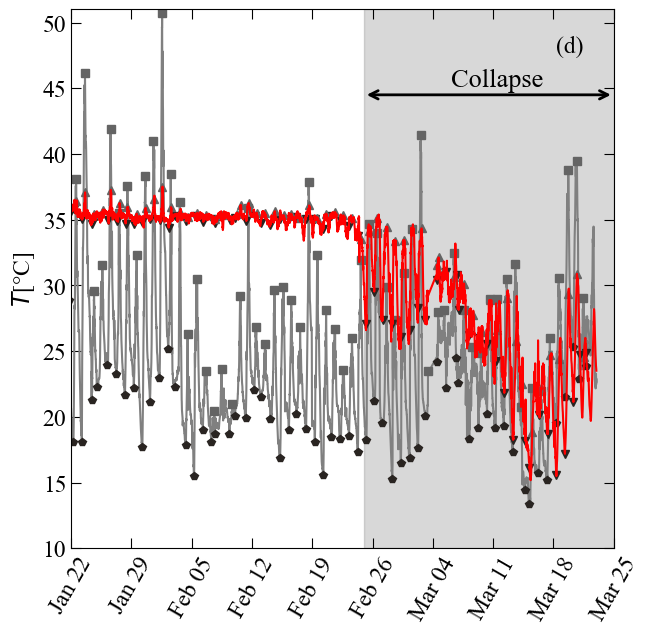

In [6]:
fig=plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.plot(Dates,E_T,'-',color="gray")

ax1.plot(np.array(Dates)[Index_min],np.array(E_T)[Index_min],'p',color="#292421")
ax1.plot(np.array(Dates_daylight)[Index_max],np.array(E_T_daylight)[Index_max],'s',color="#646464")


ax1.plot(np.array(Dates)[Index_min_hive],np.array(H_T)[Index_min_hive],'v',color="#292421")
ax1.plot(np.array(Dates_daylight)[Index_max_hive],np.array(H_T_daylight)[Index_max_hive],'^',color="#646464")

ax1.plot(Dates,H_T,'-',color="red")

ax1.set_ylabel('$T$[\u00B0C]',fontsize=17)
ax1.set_ylim([10,51])
ax1.text(np.array(Dates)[Index_min_hive][-5],47.7,'(d)',fontsize=17)

start_date = datetime(2020, 1, 22, 00, 00);end_date = datetime(2020, 3, 25, 0, 0)
ax1.axvspan(datetime(2020, 2, 25, 00, 00), end_date, color='gray', alpha=0.3) #From plot of supplementary material



xticks_dates = [start_date + timedelta(days=7*i) for i in range((end_date - start_date).days // 7 + 1)]
date_format = mdates.DateFormatter('%b %d')  # Format as "Month Day" (e.g., "Jan 01")
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xticks(xticks_dates)
ax1.set_xlim(start_date, end_date)

# # Rotate the x-axis label
plt.xticks(rotation=60)
ax1.tick_params(axis='both',direction="in", which='both', top=True, bottom=True, left=True, right=True, labelsize=17, length=7,labelbottom='off')
date_formatter = mdates.DateFormatter("%b %d")
ax1.xaxis.set_major_formatter(date_formatter)

# Double-headed arrow: from point A to point B
arrow = FancyArrowPatch((date2num(datetime(2020, 2, 25, 0, 0)), 44.5), (date2num(end_date), 44.5),
                        arrowstyle='<->', 
                        color='black', 
                        mutation_scale=15, 
                        linewidth=2)

ax1.add_patch(arrow)

# # Optionally add a label
ax1.text(date2num(datetime(2020, 3, 11, 12, 0)), 46.5, 'Collapse', ha='center', va='top', fontsize=19)


6. Sorting indexes per day

In [7]:
x_1=np.array(E_T)[Index_min]
y_1=np.array(H_T)[Index_min_hive]
z_1=np.array(Dates)[Index_min]

x_2=np.array(E_T_daylight)[Index_max]
y_2=np.array(H_T_daylight)[Index_max_hive]
z_2=np.array(Dates_daylight)[Index_max]

x=np.concatenate((x_1,x_2),axis=0) ###!!! I checked with Eduardo, the filtering occurs at the bottom inside the loop
y=np.concatenate((y_1,y_2),axis=0)
z=np.concatenate((z_1,z_2),axis=0)
Td_matrix=compute_T_d_matrix(Dates, H_T)
w= [get_Td(z[ii],Td_matrix) for ii in range(len(z))] #Td

ET_HT_d=list(zip(x, y, z,w));
ET_HT_d_sorted = sorted(ET_HT_d, key=lambda x: x[2]); 
ET_HT_d_sorted = np.array(ET_HT_d_sorted); #As array 

# The analysis for Method 1 & 2 began on January 22nd, 2020, as the data from January 21st was incomplete and noisy.
Cutoff_method1 = np.where(np.array(ET_HT_d_sorted[:,2])>=datetime(2020, 1, 22, 0, 0))[0] 
Cutoff_method2 = np.where(np.array(Dates)>=datetime(2020, 1, 22, 0, 0))[0]

7. Computation for methods Nro 1 and 2 

In [8]:
tw=timedelta(days=7)
# Method 1:
ET_HT_d_sorted=ET_HT_d_sorted[Cutoff_method1]
tw_limit_1=ET_HT_d_sorted[0][2] + tw/2  # Limit for time window_1 (Method 1)
tw_limit_2=ET_HT_d_sorted[-1][2]- tw/2  # Limit for time window_2 (Method 1)
Pi=[]; Td=[]; delta=[ ];ll=[];ul=[];D=[];M=[];B=[] ;Time=[] #For  (Method 1)

# Method 2:
Dates=Dates[Cutoff_method2]; H_T=H_T[Cutoff_method2]; E_T=E_T[Cutoff_method2]
tw_limit_1_second= Dates[0]  + tw/2     # Limit for time window_1  (Method 2)
tw_limit_2_second= Dates[-1] - tw/2     # Limit for time window_2  (Method 2)
Covariance =[]; Cross_Correlation=[]; Std_H=[]; Std_ET=[] ; T_des=[]; E_T_roll=[]; H_T_roll=[]  #For (Method 2)
T_desired = [get_Td(Dates[ii],Td_matrix) for ii in range(len(Dates))] #For (Method 2)
shift=2  # to represent 30 min For (Method 2)

Delta_hive=[]
Delta_Environment=[]


- Method 1

In [9]:
Pi,Td,delta,ll,ul,m,b,Time=Method1(ET_HT_d_sorted,tw,tw_limit_1,tw_limit_2,x_1,x_2,y_1,y_2,z_1,z_2)

- Method 2

In [10]:
Covariance, Cross_Correlation,Std_H,Std_ET,T_des,E_T_roll,H_T_roll,Dates_=Method2(Dates,H_T,E_T,T_desired,tw,tw_limit_1_second,tw_limit_2_second,shift)

In [11]:
slope_2=np.array(Cross_Correlation*np.array(Std_H)/np.array(Std_ET))
Pi_2=-np.log(slope_2)

indexes=np.where(Pi_2>=6) #Thereshold for \Pi
Pi_2[indexes]=6
Delta_2=np.array(T_des)-E_T_roll+(H_T_roll-np.array(T_des))/(np.exp(-Pi_2))
Delta_2[Delta_2>10] =10
Delta_2[Delta_2<0] = 0
#Note: Method 2 already omits any values with negative cross-correlation.

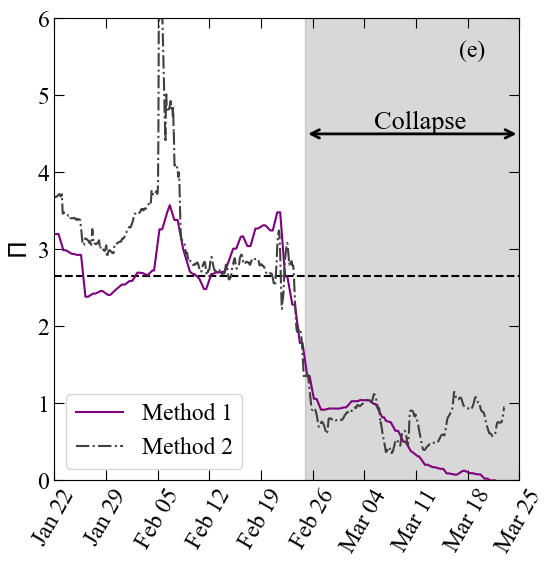

In [12]:
fig=plt.figure(figsize=(6,6))
ax10 = fig.add_subplot(111)

P_i_=2.66
ax10 .axhline(y=P_i_, color='k', linestyle='--')
ax10.plot(ET_HT_d_sorted[:,2],Pi,color="purple",label="Method 1")
ax10.plot(Dates_,Pi_2,linestyle="-.",color=(0.25, 0.25, 0.25),label="Method 2")

ax10.set_ylabel(r'$\Pi$ ',fontsize=17)
ax10 .set_ylim([0,6])
plt.xticks(rotation=60)
ax10.tick_params(axis='both',direction="in", which='both', top=True, bottom=True, left=True, right=True, labelsize=17, length=7,labelbottom='off')
date_formatter = mdates.DateFormatter("%b %d")
ax10.xaxis.set_major_formatter(date_formatter)
start_date = datetime(2020, 1, 22, 00, 00);end_date = datetime(2020, 3, 25, 0, 0)

xticks_dates = [start_date + timedelta(days=7*i) for i in range((end_date - start_date).days // 7 + 1)]
date_format = mdates.DateFormatter('%b %d')  # Format as "Month Day" (e.g., "Nov 01")
ax10.xaxis.set_major_formatter(date_format)
ax10.set_xticks(xticks_dates)
ax10.set_xlim(start_date, end_date)

ax10.text(np.array(Dates)[Index_min][-7], 5.5, '(e)', fontsize=17)
# Shade the area from x_start to the end of the plot
index_start=np.where((np.array(Pi) - 1)**2 < 0.01)[0]
ax10.axvspan(datetime(2020, 2, 25, 00, 00), end_date, color='gray', alpha=0.3) #From supplementarymaterial
plt.legend(loc='lower left', fontsize=17)

# Double-headed arrow: from point A to point B
arrow = FancyArrowPatch((date2num(datetime(2020, 2, 25, 0, 0)), 4.5), (date2num(end_date), 4.5),
                        arrowstyle='<->', 
                        color='black', 
                        mutation_scale=15, 
                        linewidth=2)

ax10.add_patch(arrow)

# Optionally add a label
ax10.text(date2num(datetime(2020, 3, 11, 12, 0)), 4.8, 'Collapse', ha='center', va='top', fontsize=19)

plt.savefig('Pi_unstable.pdf', format='pdf', dpi=700, bbox_inches='tight')


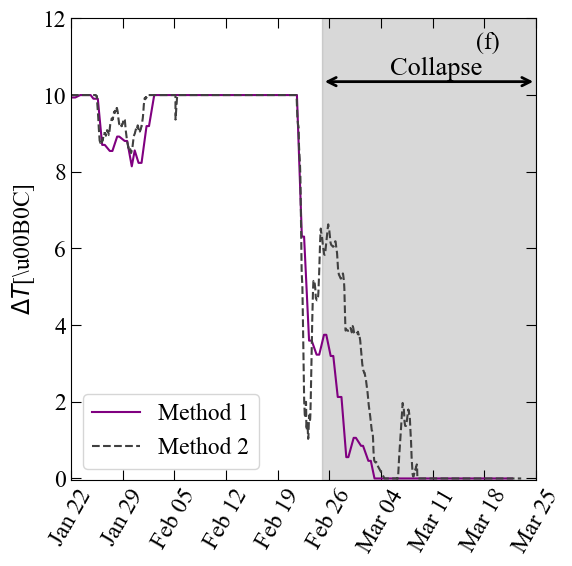

In [13]:
fig=plt.figure(figsize=(6,6))
ax14 = fig.add_subplot(111)


ax14.plot(ET_HT_d_sorted[:,2], delta, color="purple",label="Method 1")
ax14.plot(Dates_,Delta_2,"--",color=(0.25, 0.25, 0.25),label="Method 2")
ax14.set_ylabel(r'$\Delta T$[\u00B0C]',fontsize=17)
# Rotate the x-axis label
plt.xticks(rotation=60)
ax14.tick_params(axis='both',direction="in", which='both', top=True, bottom=True, left=True, right=True, labelsize=17, length=7,labelbottom='off')
date_formatter = mdates.DateFormatter("%b %d")
ax14.xaxis.set_major_formatter(date_formatter)
ax14 .set_ylim([-0.05,12])
start_date = datetime(2020, 1, 22, 00, 00);end_date = datetime(2020, 3, 25, 0, 0)


xticks_dates = [start_date + timedelta(days=7*i) for i in range((end_date - start_date).days // 7 + 1)]
date_format = mdates.DateFormatter('%b %d')  # Format as "Month Day" (e.g., "Nov 01")
ax14.xaxis.set_major_formatter(date_format)
ax14.set_xlim(start_date, end_date)
ax14.set_xticks(xticks_dates)

ax14.text(np.array(Dates)[Index_min][-7], 11.2, '(f)', fontsize=17)
ax14.axvspan(datetime(2020, 2, 25, 00, 00), end_date, color='gray', alpha=0.3) #From supplementarymaterial

# Double-headed arrow: from point A to point B
arrow = FancyArrowPatch((date2num(datetime(2020, 2, 25, 0, 0)), 10.35), (date2num(end_date), 10.35),
                        arrowstyle='<->', 
                        color='black', 
                        mutation_scale=15, 
                        linewidth=2)

ax14.add_patch(arrow)

# Optionally add a label
ax14.text(date2num(datetime(2020, 3, 11, 12, 0)), 11.0, 'Collapse', ha='center', va='top', fontsize=19)


plt.legend(loc='lower left', fontsize=17)
plt.savefig('Delta_unstable.pdf', format='pdf', dpi=700, bbox_inches='tight')